Could not find a 'train' folder. Trying root folder...
Dataset Loaded!
Total Images: 11788
Classes (Bird Species): 200
Example Classes: ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet']

Here is a random batch of birds from your dataset:


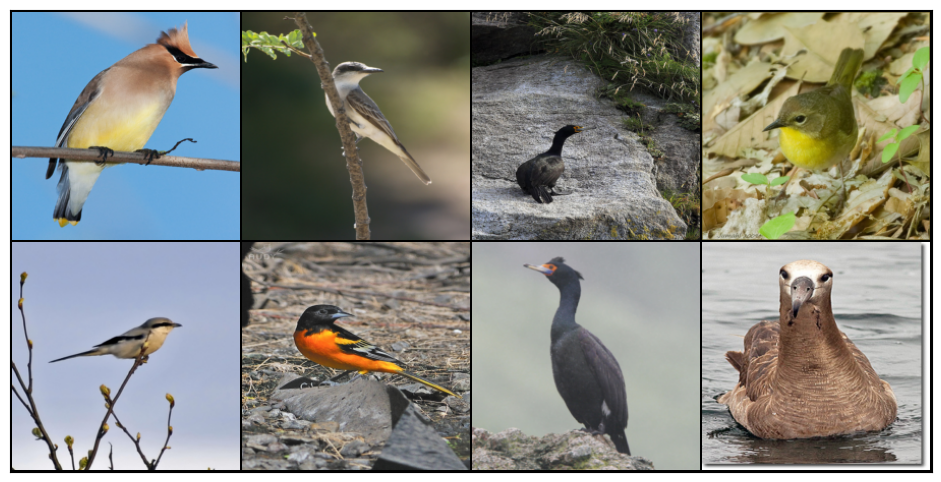

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================
# 1. SETUP PATHS & TRANSFORMS
# ==========================================
# CHANGE THIS to the actual path where you unzipped the data
# The folder structure should look like: data_dir/train/SPECIES_NAME/image.jpg
data_dir = './images' 

# Standard transforms: Resize to 224x224 (standard for AI models) & Convert to Tensor
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Mean/Std for normalization
train_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # We will add normalization later, let's keep it simple for visualization
])

# ==========================================
# 2. LOAD DATA
# ==========================================
# We assume the dataset has a 'train' folder. If not, point directly to the data root.
try:
    train_ds = ImageFolder(os.path.join(data_dir, 'train'), transform=train_tfms)
except FileNotFoundError:
    print("Could not find a 'train' folder. Trying root folder...")
    train_ds = ImageFolder(data_dir, transform=train_tfms)

print(f"Dataset Loaded!")
print(f"Total Images: {len(train_ds)}")
print(f"Classes (Bird Species): {len(train_ds.classes)}")
print(f"Example Classes: {train_ds.classes[:5]}")

# ==========================================
# 3. VISUALIZE A BATCH
# ==========================================
batch_size = 8
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        # Convert tensor images back to standard format for display
        ax.imshow(torchvision.utils.make_grid(images, nrow=4).permute(1, 2, 0))
        break

print("\nHere is a random batch of birds from your dataset:")
show_batch(train_dl)